# 2 Understanding your data I - Exploratory Visualizations

### Python for Data Science Tutorials:
#### 1 Python basics and shortcuts  
#### 2 Understanding your data I - Exploratory Visualizations
#### 3 Understanding your data II - Data Cleaning, Summaries and Feature Engineering
#### 4 Machine Learning Pipeline
#### 5 Machine Learning Parameter Tuning Guidebook
#### 6 Towards automated machine learning 
#### 7 Visualize stories
#### 8 Machine Learning Parameter Tuning Guidebook
#### 9 Tensorflow for machine learning
#### 10 Tensorflow for image analytics

In [51]:
# Basics for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
##set style
plt.style.use('ggplot') # or plt.style.use('classic') or use seaborn - seaborn.set()
##show image
#for scripts: plt.show() - one show per session
#for Ipython: %matplotlib notebook - interactive plots;
#             %matplotlib inline - static images
#save figures: fig = plt.figure(), fig.savefig('xx.png')


# 2.1 Line Plot

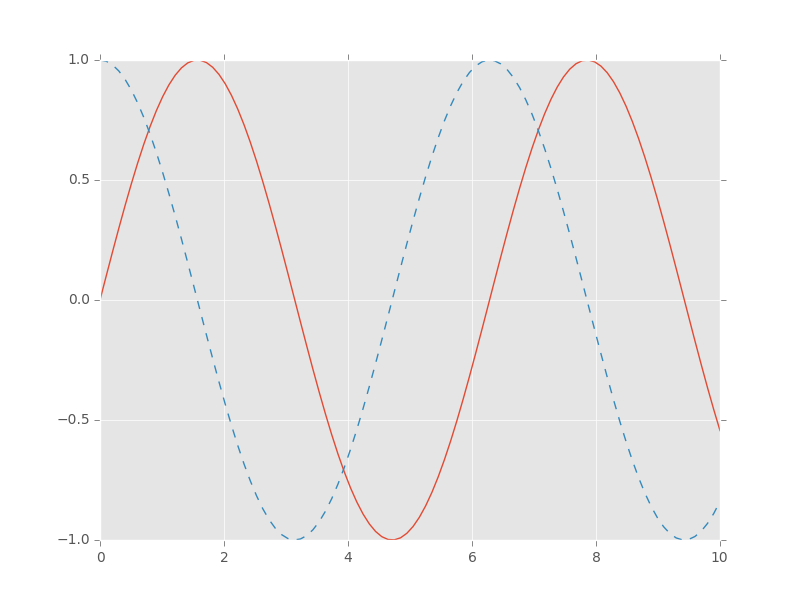

In [6]:
#Example
import numpy as np
x = np.linspace(0,10,100)
fig = plt.figure()
plt.plot(x,np.sin(x),'-')
plt.plot(x,np.cos(x),'--');
fig.savefig('/Users/sijia/Desktop/test_image.png')
from IPython.display import Image
Image('/Users/sijia/Desktop/test_image.png')

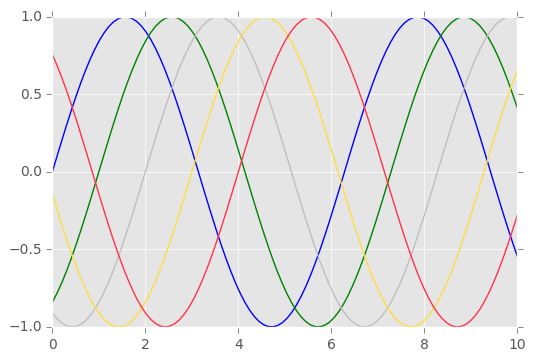

In [8]:
#color
%matplotlib inline
plt.plot(x, np.sin(x - 0), color='blue') #color by name
plt.plot(x, np.sin(x - 1), color='g') #short color code rgbcmyk
plt.plot(x, np.sin(x - 2), color='0.75') #gray scale between 0-1
plt.plot(x, np.sin(x - 3), color='#FFDD44') #Hex Code RRGGBB from 00 to FF
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 adn 1


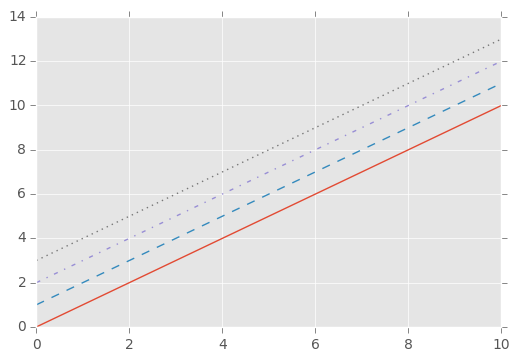

In [9]:
#line style
plt.plot(x, x + 0, linestyle='solid') # or linestyle='-'
plt.plot(x, x + 1, linestyle='dashed')# or linestyle='--'
plt.plot(x, x + 2, linestyle='dashdot')# or linestyle='-.'
plt.plot(x, x + 3, linestyle='dotted');# or linestyle=':'

In [ ]:
#adjust axis
plt.xlim(10,0)
plt.ylim(2,2)
plt.axis([10,0,2,2])
plt.axis('tight')
plt.axis('equal')

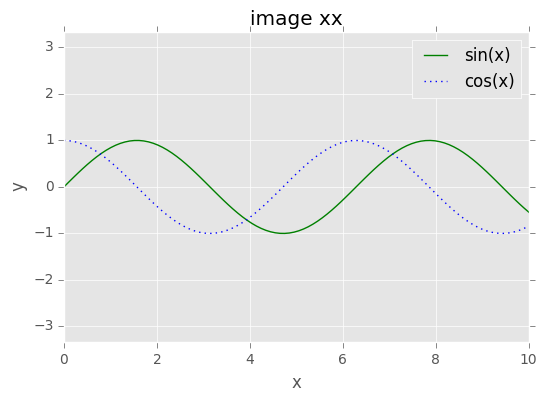

In [10]:
#Labeling
plt.title('image xx')
plt.xlabel('x')
plt.ylabel('y')
#the position,size and style of these labels can be adjusted using optional arguments
#when multiple labels present - legend can be created
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend();

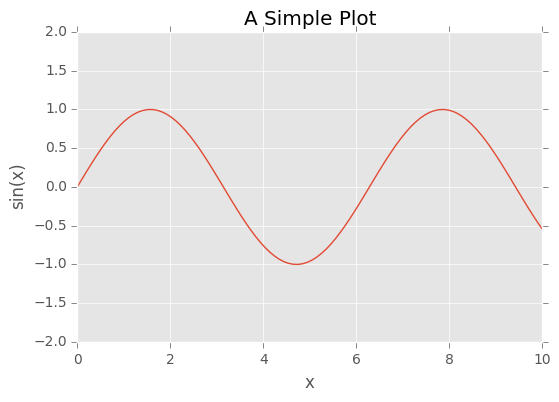

In [11]:
#Objective oriented way of creating graphs
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),xlabel='x', ylabel='sin(x)',title='A Simple Plot');


# 2.2 Scatter Plot

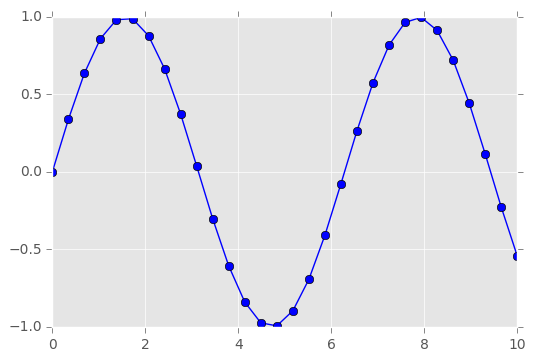

In [18]:
# Use plt.plot
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black',markersize=4);
plt.plot(x,y,'-ob')

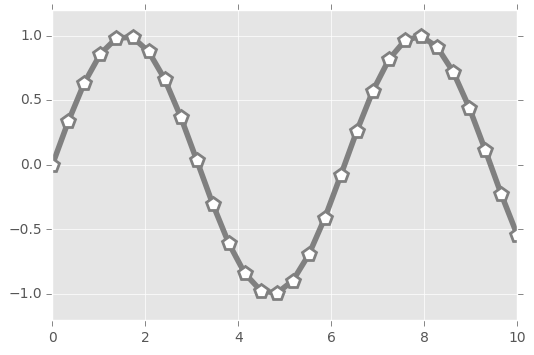

In [22]:
plt.plot(x, y, '-p', color='gray',
                    markersize=10, linewidth=4,
                    markerfacecolor='white',
                    markeredgecolor='gray',
                    markeredgewidth=2)
plt.ylim(-1.2, 1.2);

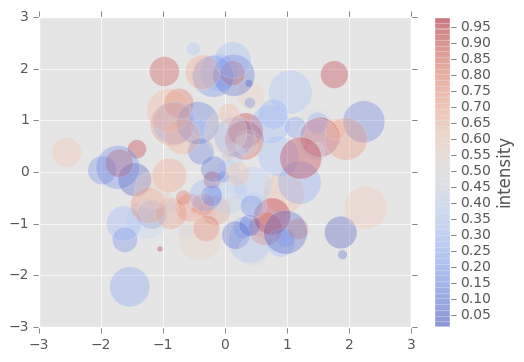

In [36]:
#use plt.scatter
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,cmap='coolwarm') #other useful ones: Blues,Greens,autumn
plt.colorbar(ticks = np.linspace(0,1,21),label="intensity"); # show color scale - how to adjust color scale? - tick? 

# 2.3 Histograms and Density Plots

[  8 176 486 298  32]


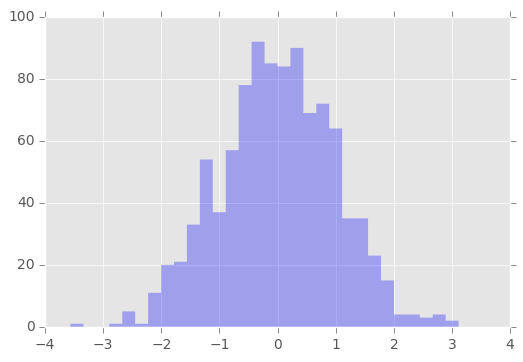

In [46]:
#Basic Histograms
data = np.random.randn(1000);
plt.hist(data, bins=30, normed=False, alpha=0.3,
                    histtype='stepfilled', color='blue',
                    edgecolor='none')  # normed controls whether it is frequency or density. 
#get number of counts and edges
counts, bin_edges = np.histogram(data, bins=5) 
print(counts)

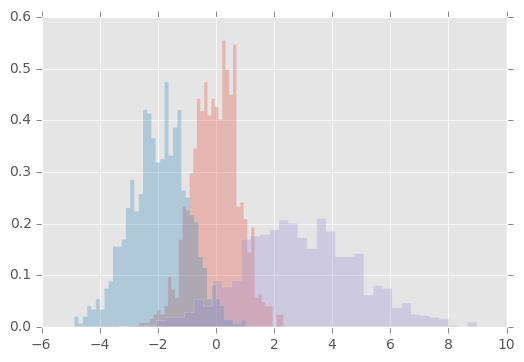

In [45]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);


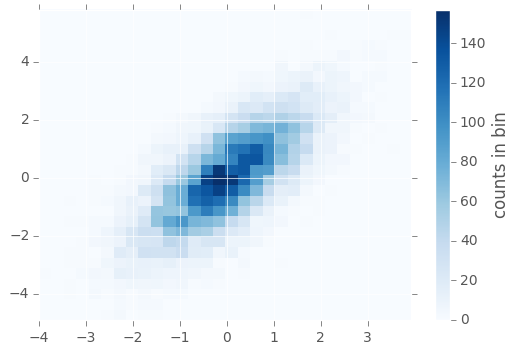

In [47]:
#two dimentional plots
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar(label='counts in bin')

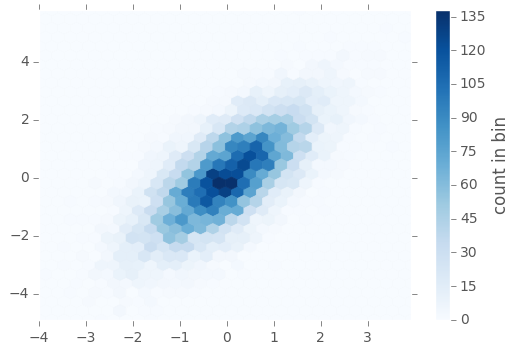

In [48]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')


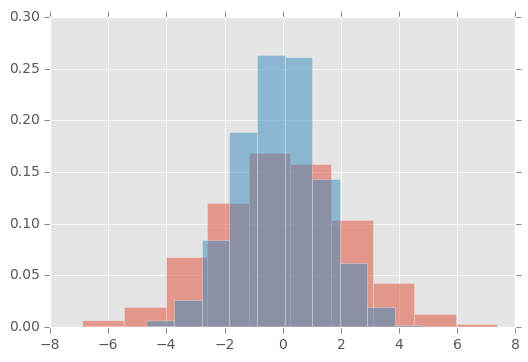

In [52]:
#Use seaborn for kernal density estimation plots
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)


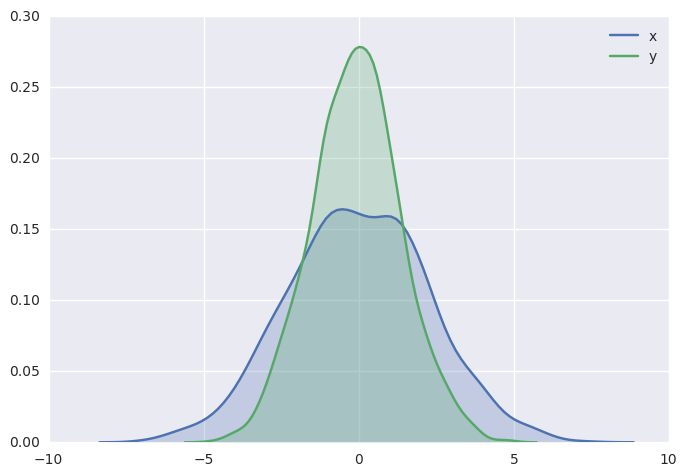

In [53]:
import seaborn
for col in 'xy': 
    seaborn.kdeplot(data[col], shade=True)

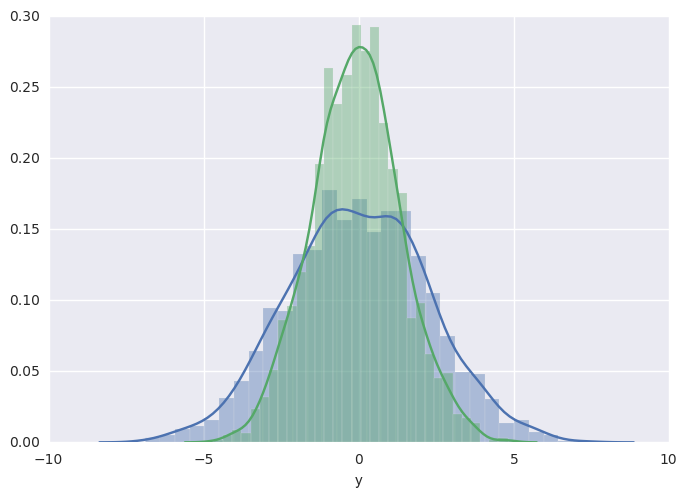

In [54]:
seaborn.distplot(data['x'])
seaborn.distplot(data['y']);

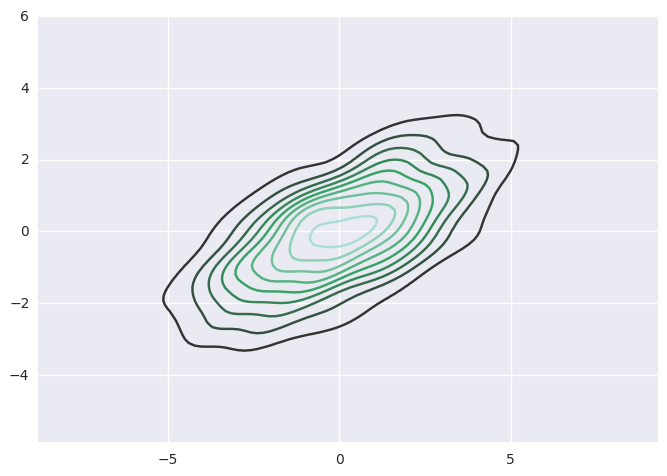

In [56]:
seaborn.kdeplot(data);

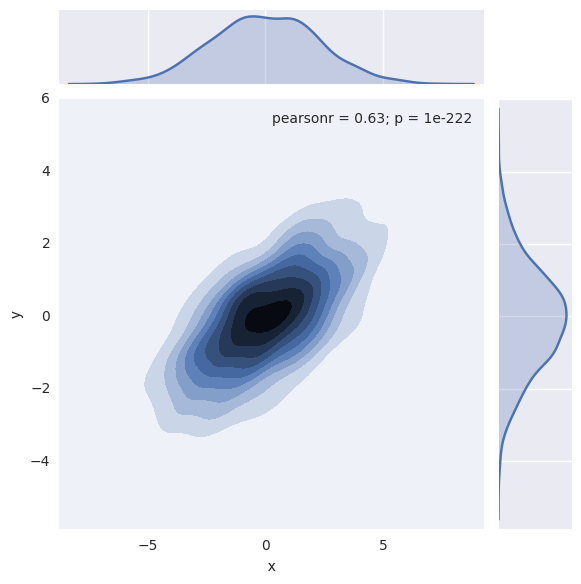

In [57]:
seaborn.jointplot("x", "y", data, kind='kde');

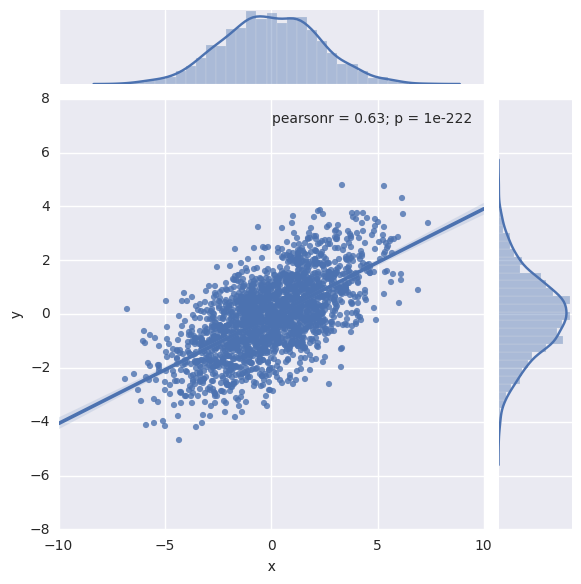

In [58]:
seaborn.jointplot("x", "y", data, kind='reg');

# 2.4 Bar Plots

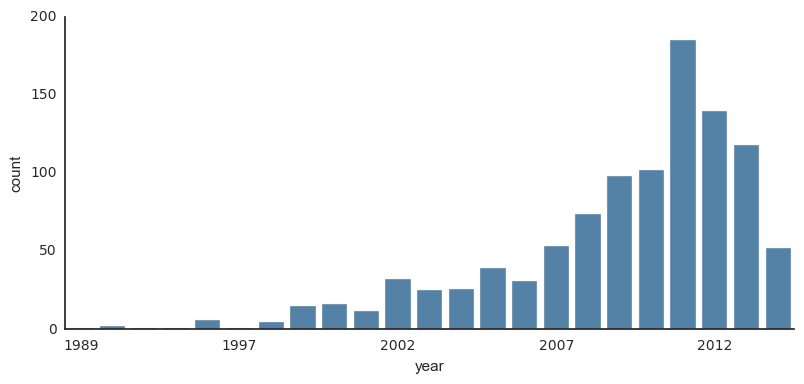

In [72]:
planets = sns.load_dataset('planets')
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,kind="count", color='steelblue')
    g.set_xticklabels(step=5)

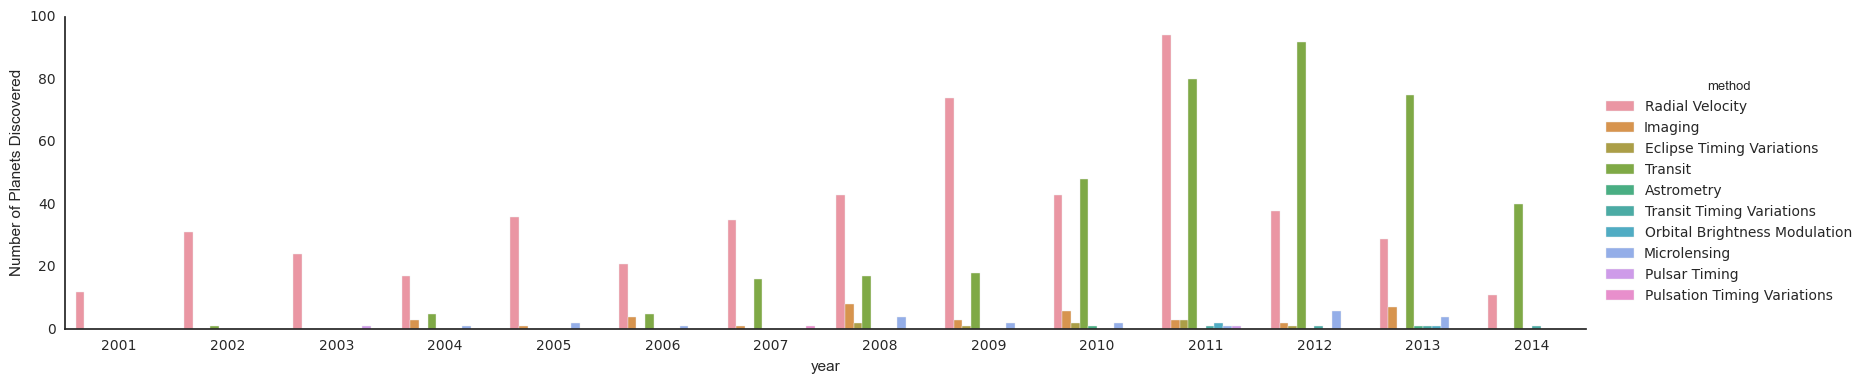

In [73]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')


# 2.5 Mutiple Plots and Feature Visualizations

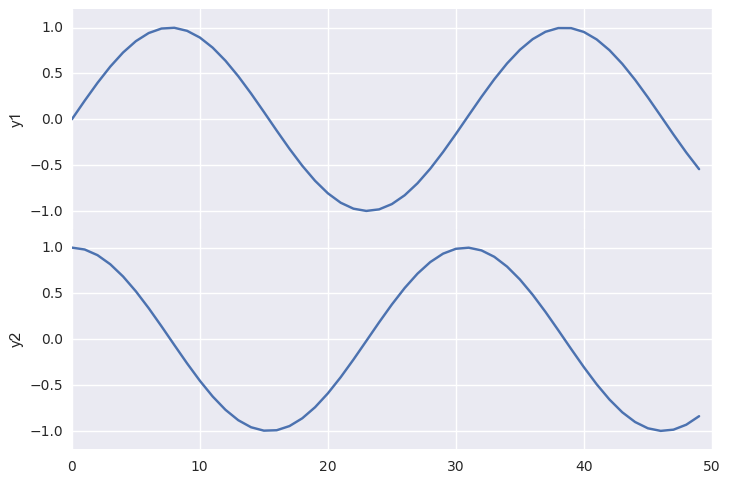

In [61]:
#The basic method of creating an axes is to use the plt.axes function
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],xticklabels=[], ylim=(-1.2, 1.2)) # [bottom,left,width,height]
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],ylim=(-1.2, 1.2))
ax1.set_ylabel('y1')
ax2.set_ylabel('y2')
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

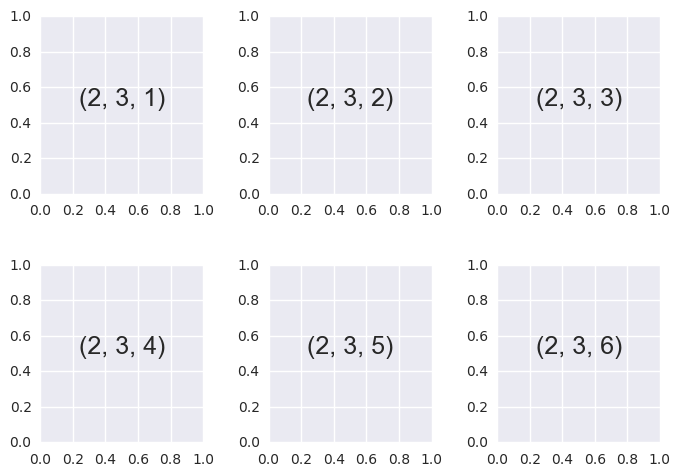

In [62]:
#Use subplots
fig = plt.figure() 
fig.subplots_adjust(hspace=0.4, wspace=0.4) 
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')


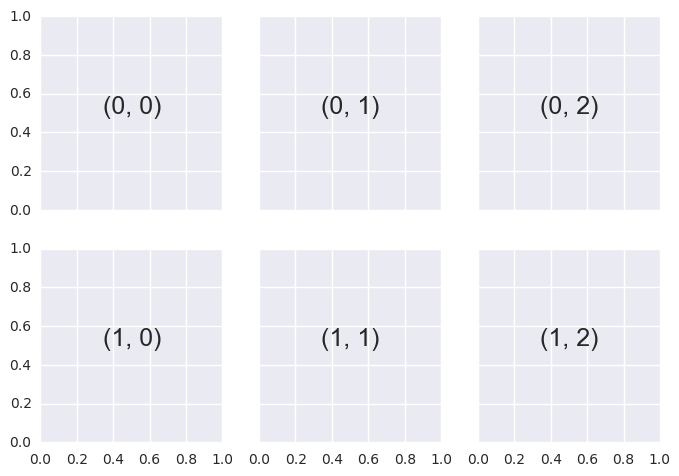

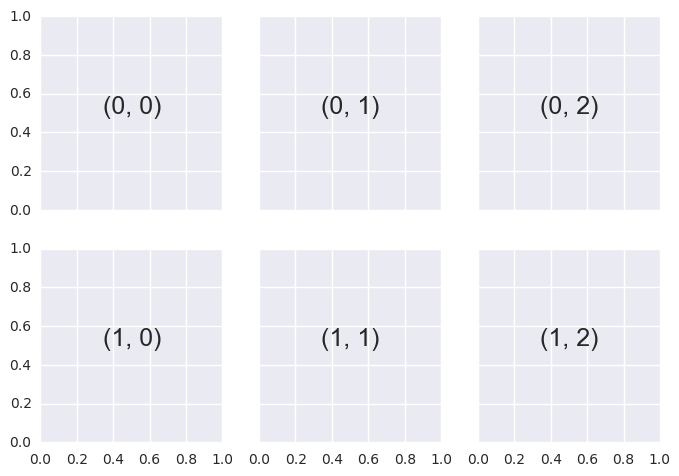

In [64]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),fontsize=18, ha='center')
fig

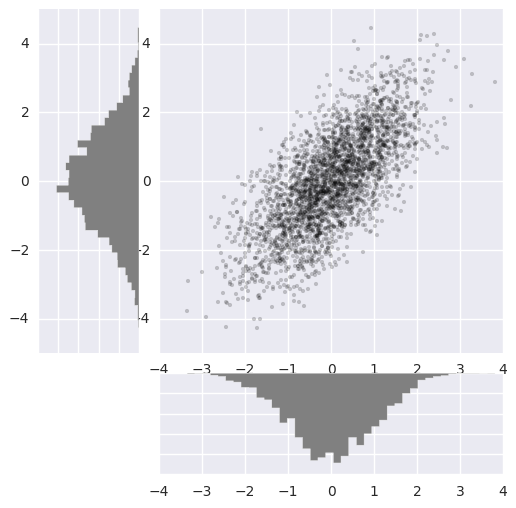

In [66]:
#use plt.GridSpec
# Create some normally distributed data mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled',orientation='horizontal', color='gray')
y_hist.invert_xaxis()
# Can we use this functionality to create block plots like in tableau?

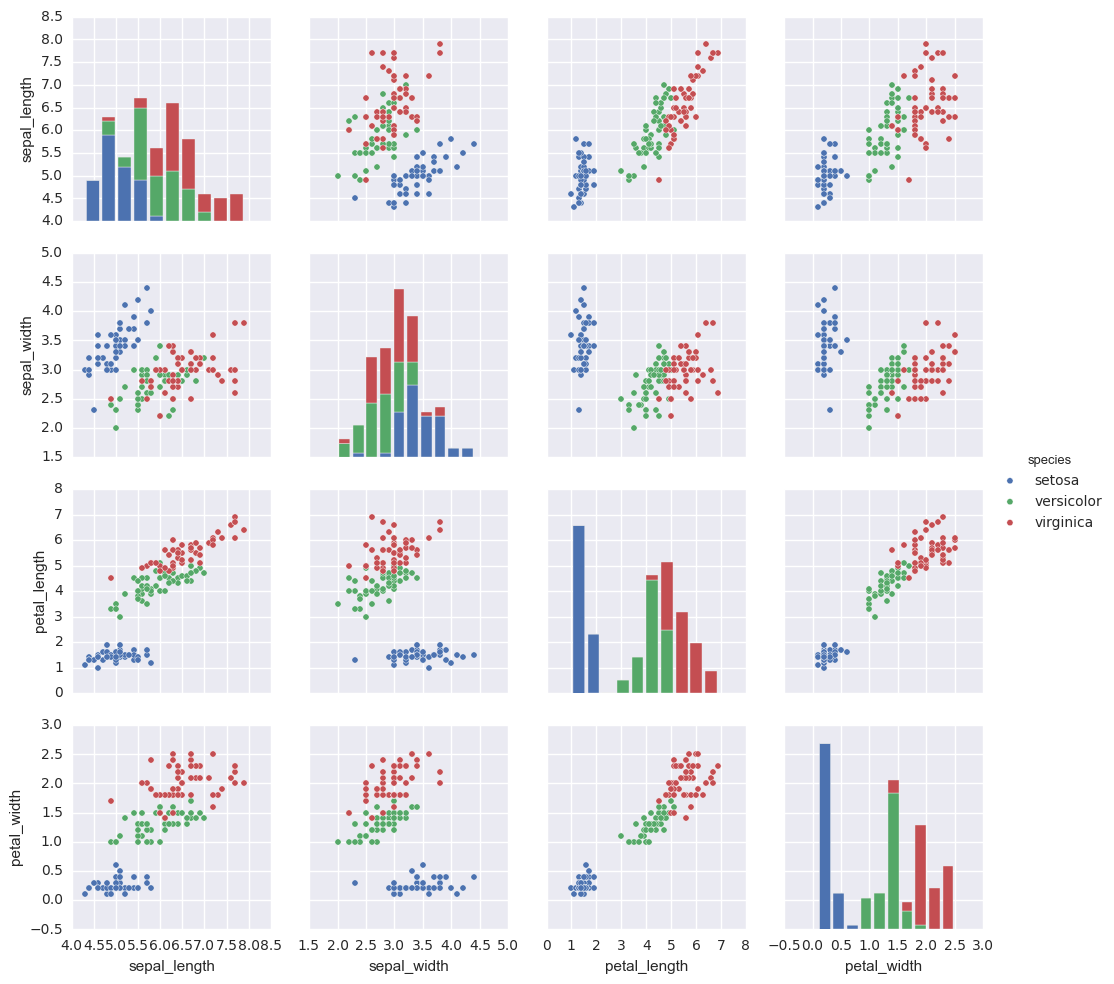

In [67]:
# Pairplots in seaborn
import seaborn as sns
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', size=2.5);

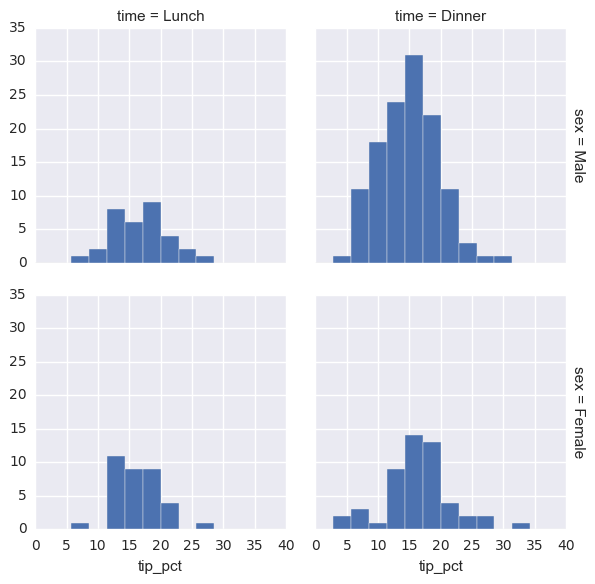

In [69]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

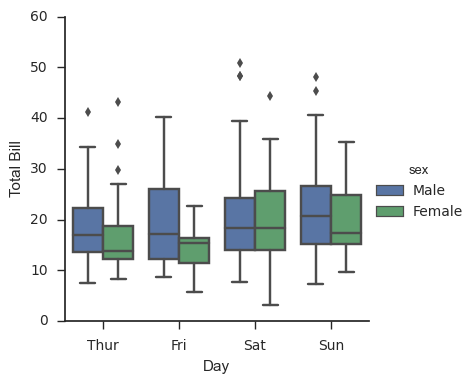

In [71]:
#Factor plots
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box") 
    g.set_axis_labels("Day", "Total Bill");

In [ ]:
# Violin plot - examples to be added
with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data, split=True, inner="quartile",palette=["lightblue", "lightpink"]);

# 2.6 Style and Adjustments

In [ ]:
# labels
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

In [ ]:
# legends
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();
ax.legend(loc='upper left', frameon=False,ncol=2) #'lower center'
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

In [ ]:
# axises
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);
plt.axis([-1, 11, -1.5, 1.5]);
plt.axis('tight');
plt.axis('equal')

In [ ]:
# colorbars
#use plt.cm to check what is available 
#Sequential colormaps
#These are made up of one continuous sequence of colors (e.g., binary or viri dis).
#Divergent colormaps
#These usually contain two distinct colors, which show positive and negative devi‐ ations from a mean (e.g., RdBu or PuOr).
#Qualitative colormaps
#These mix colors with no particular sequence (e.g., rainbow or jet).
#RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK)

plt.colorbar();
plt.clim(-1, 1);
plt.colorbar(extend='both') # account for extreme values
# distinct colors
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

In [ ]:
# styles
plt.style.use('classic')# 'seaborn-whitegrid','fivethirtyeight','ggplot','grayscale'
seaborn.set()

In [ ]:
#Text and Annotations
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style) # x,y value pair and annotations
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
%matplotlib inline
import warnings warnings.simplefilter('ignore')
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
                       arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
                       arrowprops=dict(arrowstyle="->",
                                       connectionstyle="angle3,angleA=0,angleB=-90"));


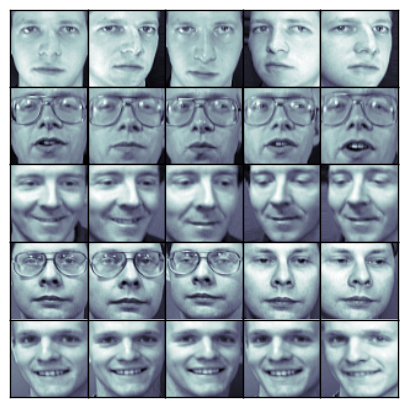

In [3]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
#ticks
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
                ax[i, j].xaxis.set_major_locator(plt.NullLocator()) #plt.MaxNLocator(3),plt.MultipleLocator(np.pi / 2)
                ax[i, j].yaxis.set_major_locator(plt.NullLocator())
                ax[i, j].imshow(faces[10 * i + j], cmap="bone")

In [8]:
def format_func(value, tick_number):
# find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi)) 
    if(N == 0):
        return "0"
￼￼￼￼￼￼    elif(N == 1):
        return r"$\pi/2$"
    elif(N == 2):
        return r"$\pi$"
    elif(N % 2) > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig


SyntaxError: invalid syntax (<ipython-input-8-595d7e591bce>, line 6)

# 2.7 Others

In [ ]:
fig = plt.figure()
ax = plt.axes()
#• plt.xlabel() → ax.set_xlabel() • plt.ylabel() → ax.set_ylabel() • plt.xlim() → ax.set_xlim()
#• plt.ylim() → ax.set_ylim()
#• plt.title() → ax.set_title()
ax.set(xlim=(0, 10), ylim=(-2, 2),xlabel='x', ylabel='sin(x)',title='A Simple Plot');


In [ ]:
#Error plots refer to book

In [ ]:
#Basemap plots refer to book

In [ ]:
#Contour and 3-D plots refer to book